# CS-6570 Lecture 21 - Training Neural Networks

**Dylan Zwick**

*Weber State University*

In our last class, we introduced the idea of a neural network, and we went through an example of a neural network in action, without concerning ourselves about the particulars of the math or the particulars of the code. Today, we'll dive into those particulars, both for the math and for the code that implements it.

**Gradient Descent and the Perceptron**

First, we'll look at the simplest example of a neural network - the perceptron - which is a neural network with a single output node, no hidden nodes, and a sigmoid activation function.

![Perceptron](Perceptron.png)

If the inputs are $X = (x_{1},x_{2},\ldots,x_{m})$, then these inputs are combined into the net input function through a weighted linear combination:

$\displaystyle z(X) = w_{0} + w_{1}x_{1} + w_{2}x_{2} + \cdots + w_{m}x_{m}$.
<br>
This linear combination is then sent to an activation function, in this case the sigmoid:
<center>
    <br>
    $\displaystyle \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(w_{0}+w_{1}x_{1}+w_{2}x_{2}+\cdots+w_{m}x_{m})}}$
    <br>
</center>
<br>
The sigmoid function goes from 0 to 1 and provides a number we can interpret as a probability.

![Sigmoid](Sigmoid.png)

We then get our final prediction by sending the output of the sigmoid to a unit step function, which predicts a $1$ if the value is above a given threshold (frequently $.5$), and $0$ otherwise.

Suppose we have an observation $X$ with output $y$. We want to choose our weights so as to maximize the likelihood of the observed outcome, which is given by:

$\displaystyle \sigma(z)^{y}(1-\sigma(z))^{1-y}$.

Here, we're using that $y$ is either $0$ or $1$. Now, typically instead of maximizing a function, we define a *loss function*, and seek to minimize it. Also, we can note the logarithm is an increasing function, so the input that maximizes / minimizes a function will also maximize / minimize its logarithm. Using these observations, we define our loss function:

$\displaystyle J = -\left(y\log{\sigma(z(X))} + (1-y)\log{(1-\sigma(z(X)))}\right)$.

We want to find the values of the weights $w_{0},w_{1},\ldots,w_{m}$ that minimize this function, and to do this we'll want to find the function's gradient. This means finding the partial derivatives with respect to each weight. We can get the partial derivative of this function with respect to the weight $w_{j}$ using the chain rule:

$\displaystyle \frac{\partial J}{\partial w_{j}} = \frac{\partial J}{\partial z}\frac{\partial z}{\partial w_{j}}$.

This will require a bit of calculus, but the derivative of the sigmoid function is:

$\displaystyle \frac{d\sigma}{dz} = \frac{d}{dz}\left(\frac{1}{1+e^{-z}}\right) = \frac{e^{-z}}{(1+e^{-z})^{2}} = \left(\frac{1}{1+e^{-z}}\right)\left(1-\frac{1}{1+e^{-z}}\right) = \sigma(z)(1-\sigma(z))$

From this we get that the derivative of the loss function:

$\displaystyle \frac{\partial J}{\partial w_{j}} = \left(-y\left(\frac{1}{\sigma(z)}\right)\sigma(z)(1-\sigma(z)) + (1-y)\left(\frac{1}{1-\sigma(z)}\right)\sigma(z)(1-\sigma(z))\right)\frac{\partial z}{\partial w_{j}} = (\sigma(z)-y)x_{j}$

We express as $\delta$ the partial derivative $\displaystyle \frac{\partial J}{\partial z}$, and so from this we get $\delta = \sigma(z)-y$. This value is typically called the *error* of the output node.

From this we can see our gradient is $\nabla J = \delta X$.

**Gradient Descend and the Neural Network**

Suppose now instead of a simple perceptron, we've got a neural network with $t$ output nodes, and $d$ hidden nodes.

![Multi-Layer Neural Network](Multi-Layer.png)

At each non-input node there is a net input function, which we denote by $z_{j}^{(l)}$, where $l \in \{in,h,out\}$. So, for example, the net input to the index $1$ node in the hidden layer is:


$\displaystyle z_{1}^{(h)} = w_{0,1}^{(h)}a_{0}^{(in)} + w_{1,1}^{(h)}a_{1}^{(in)} + \cdots w_{m,1}^{(h)}a_{m}^{(in)}$

The output value of each node is the sigmoid of its inputs, so for example the output of the index $1$ node in the hidden layer is:

$\displaystyle a_{1}^{(h)} = \sigma(z_{1}^{(d)})$

Note that we can view the set of inputs to the hidden layer as a row vector $\textbf{z}^{(h)}$, with values given by:

$\displaystyle \textbf{z}^{(h)} = \left(\begin{array}{cccc} z_{1}^{(h)} & z_{2}^{(h)} & \cdots & z_{d}^{(h)}\end{array}\right) = \left(\begin{array}{cccc} a_{0}^{(in)} & a_{1}^{(in)} & \cdots & a_{m}^{(in)}\end{array}\right)\left(\begin{array}{cccc} w_{0,1}^{(h)} & w_{0,2}^{(h)} & \cdots & w_{0,d}^{(h)} \\ w_{1,1}^{(h)} & w_{1,2}^{(h)} & \cdots & w_{1,d}^{(h)} \\ \vdots & \vdots & \ddots & \vdots \\ w_{m,1}^{(h)} & w_{m,2}^{(h)} & \cdots & w_{m,d}^{(h)}\end{array}\right) = \textbf{a}^{(in)}\textbf{W}^{(h)}$


For any given input $X$, the output will be one of the categories $1,\ldots,t$. We can encode this as a "onehot" vector, in which every element is zero except the one corresponding to the output category, which is $1$. So, for example, if the output is the third category, the output vector $\textbf{y}$ will be:
$\displaystyle \textbf{y} = \left(\begin{array}{cccccc} 0 & 0 & 1 & 0 & \cdots & 0\end{array}\right)$

In this case, the likelihood of an observation will be:

$\displaystyle \prod_{i = 1}^{t}\sigma(z_{i}^{(out)})^{y_{i}}(1-\sigma(z_{i}^{(out)}))^{1-y_{i}}$,

and the loss function will be:

$\displaystyle J = -\sum_{i = 1}^{t}\left(y_{i}\log{\sigma(z_{i}^{(out)})} + (1-y_{i})\log{(1-\sigma(z_{i}^{(out)}))}\right)$.


We define $\delta_{j}^{(l)}$ to be the rate of change of the loss function with respect to the input to node $j$ of layer $l$. For example:


$\displaystyle \delta_{1}^{(h)} = \frac{\partial J}{\partial z_{1}^{(h)}}.$

From the chain rule, we know this will be:

$\displaystyle \frac{\partial J}{\partial z_{1}^{(h)}} = \sum_{i = 1}^{t}\frac{\partial J}{\partial z_{i}^{(out)}}\frac{\partial z_{i}^{(out)}}{\partial z_{1}^{(h)}}$.

Now, by definition we have:

$\displaystyle z_{i}^{(out)} = \sum_{j = 1}^{d}w_{j,i}^{(out)}\sigma(z_{j}^{(h)})$.

Taking the partial derivative of this with respect to $z_{1}^{(h)}$ we have:

$\displaystyle \frac{\partial z_{i}^{(out)}}{\partial z_{1}^{(h)}} = w_{1,i}^{(out)}\sigma'(z_{1}^{(h)}) = w_{1,i}^{(out)}\sigma(z_{1}^{(h)})(1-\sigma(z_{1}^{(h)}))$


Using this to calculate $\delta_{1}^{(h)}$, and noting that $\displaystyle \delta_{i}^{(out)} = \frac{\partial J}{\partial z_{i}^{(out)}}$, we get:

$\displaystyle \delta_{1}^{(h)} = \sum_{i = 1}^{t}\delta_{i}^{(out)}w_{1,i}^{(out)}\sigma(z_{1}^{(h)})(1-\sigma(z_{1}^{(h)}))$


Writing

$\displaystyle \delta^{(h)} = \left(\begin{array}{cccc} \delta_{1}^{(h)} & \delta_{2}^{(h)} & \cdots && \delta_{d}^{(h)}\end{array}\right)$

we have more generally that

$\displaystyle \delta^{(h)} = \delta^{(out)}(\textbf{W}^{(out)})^{T} \odot (a^{(h)} \odot (1-a^{(h)}))$,

where $\odot$ is element-wise multiplication. In an identical fashion we can get:

$\displaystyle \delta^{(in)} = \delta^{(h)}(\textbf{W}^{(h)})^{T} \odot (a^{(in)} \odot (1-a^{(in)}))$.

This idea of propagating these $\delta$ terms, as mentioned earlier known as *error* terms, backwards through the network is the reason for the term backpropagation. Once we have these taking the partial derivatives is easy. For any weight in $\textbf{W}^{(out)}$ (the weights connecting the hidden layer and the output layer) we have:

$\displaystyle \frac{\partial J}{\partial w_{i,j}^{(out)}} = a_{j}^{(h)}\delta_{i}^{(out)}$,

and for any weight in $\textbf{W}^{(h)}$ (the weights connecting the input layer and the hidden layer) we have:

$\displaystyle \frac{\partial J}{\partial w_{i,j}^{(h)}} = a_{j}^{(in)}\delta_{i}^{(h)}$.

Using these, we can calculate our updates for gradient descent.

Note throughout we've assumed we're doing stochastic gradient descent - updating just based upon one observation. This is what we'll do in our program too, but to do this for batch stochastic gradient descent, or just standard gradient descent, the math is almost identical - just with even more summations and indices to keep straight!

**Implementing the Neural Network**

Today we'll step through the code we rushed through last time. I've broken up the neural network class into a number of separate functions so we can better understand how they work together, although to be clear keeping them all within a class is definitely the better way to do it!

First, you should make sure you've got the handwritten digits data we went through last class unzipped and in the same directory as this Jupyter notebook. If you don't you'll want to download the zip files from http://yann.lecun.com/exdb/mnist/. It consists of the following parts:

* Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 examples)
* Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
* Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 examples)
* Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

You can unzip these files by uncommenting and running the code below.

In [14]:
#Uncomment and run the code below to unzip the files.
"""
import sys
import gzip
import shutil
import os

zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], 'wb') as outfile:
        outfile.write(decompressed.read())
""";

Next we'll load and process the data. Like last time, the details here aren't important.

In [16]:
import sys
import os
import struct
import numpy as np
import warnings
warnings.filterwarnings("ignore")
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

We'll create our training data and test data, and take a look at the first digits of each type in our training data.

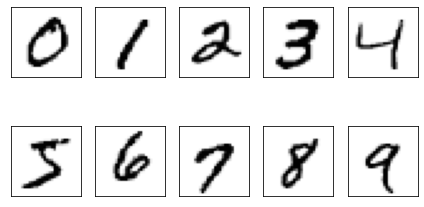

In [18]:
X_train, y_train = load_mnist('', kind='train')

X_test, y_test = load_mnist('', kind='t10k')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

OK. Now that we've got our data ready to go, we'll want to code the neural network. The first thing we'll create is a function for turning a set of data into a "onehot" encoding.

In [20]:
def onehot(y, n_classes):
    onehot = np.zeros((y.shape[0], n_classes))
    for idx, val in enumerate(y.astype(int)):
        onehot[idx, val] = 1.
    return onehot

So, for example, if I created a very simple dataset (0,1,1,0,1,0,0) it can read that in and encode it as follows: 

In [22]:
example = np.array([0,1,1,0,1,0,0])
onehot(example,2)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Next we'll define the sigmoid function.

In [24]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [25]:
print(sigmoid(-17))
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(6000))

4.1399375473943306e-08
5e-01
7.310585786300049e-01
1e+00


Alright, so now we'll want to start actually creating functions specific to a neural network. First, we'll define a function that, given our weights and an input, will calculate the inputs to and outputs from the nodes with the network.

In [27]:
def forward(X,W_h,b_h,W_out,b_out):
    
    z_h = np.dot(X, W_h) + b_h

    a_h = sigmoid(z_h)

    z_out = np.dot(a_h, W_out) + b_out

    a_out = sigmoid(z_out)

    return z_h, a_h, z_out, a_out

Next, we'll define our back-propagation function. This will return the modified weights after back propagation with a learning rate $\eta$ (eta). Note that we separate out the bias terms from the rest of the weights.

In [29]:
def back(X,y,W_h,b_h,W_out,b_out,eta):
    
    z_h,a_h,z_out,a_out = forward(X,W_h,b_h,W_out,b_out)
    
    delta_out = a_out - y

    sigmoid_derivative_h = a_h * (1. - a_h)

    delta_h = (np.dot(delta_out, W_out.T) * sigmoid_derivative_h)
    
    grad_W_h = np.dot(X.T, delta_h)
    grad_b_h = np.sum(delta_h, axis=0)

    grad_W_out = np.dot(a_h.T, delta_out)
    grad_b_out = np.sum(delta_out, axis=0)

    W_h -= eta * grad_W_h
    b_h -= eta * grad_b_h

    W_out -= eta * grad_W_out
    b_out -= eta * grad_b_out
    return W_h,b_h,W_out,b_out

Finally, we'll define our fit function. We provide this function with our training data, the number of epochs (passes through the training data) we want, the number of hidden nodes in our hidden layer, the learinng rate eta, and a random seed that is initialized to 1 if not specified.

Within this code it also initializes some starting weights. The bias weights are all initially set to 0, while the other weights are sampled from a normal distribution.

In [31]:
def fit(X_train, y_train, epochs, n_hidden, eta, seed=1):
    
    random = np.random.RandomState(seed)
   
    n_output = np.unique(y_train).shape[0]  # number of class labels
    n_features = X_train.shape[1]

    # weights for input -> hidden
    b_h = np.zeros(n_hidden)
    W_h = random.normal(loc=0.0, scale=0.1,size=(n_features,n_hidden))

    # weights for hidden -> output
    b_out = np.zeros(n_output)
    W_out = random.normal(loc=0.0, scale=0.1,size=(n_hidden, n_output))

    y_train_enc = onehot(y_train, n_output)

    # iterate over training epochs
    for i in range(epochs):

        indices = np.arange(X_train.shape[0])

        random.shuffle(indices)

        for idx in range(indices.shape[0]):
            W_h,b_h,W_out,b_out = back(X_train[[idx]],y_train_enc[[idx]],W_h,b_h,W_out,b_out,eta)

        # Evaluation after each epoch during training
        z_h, a_h, z_out, a_out = forward(X_train,W_h,b_h,W_out,b_out)
        cost = np.sum(-y_train_enc * (np.log(a_out)) - (1. - y_train_enc) * np.log(1. - a_out))

        y_train_pred = np.argmax(z_out, axis=1)

        train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0])

        sys.stderr.write('\r%d/%d | Cost: %.2f '
                             '| Train Acc.: %.2f%% ' %
                             (i+1, epochs, cost,train_acc*100))
        sys.stderr.flush()

Finally, we'll run our optimization function about 10 times, using a neural network with 30 hidden notes, a learning rate of $.001$, and an initial random seed of $42$.

In [33]:
#hyperparameters

epochs = 10
n_hidden = 30
eta = .001
seed = 42

fit(X_train, y_train, epochs, n_hidden, eta, seed)

10/10 | Cost: 26954.38 | Train Acc.: 93.26% 

Not bad! Note that in the code from last time, we wrapped all these functions up as methods within a neural net class. To be clear, that is absolutely a better way to do it! We broke things out above so we could walk through it, but the implementation from last time is suprior, and what you should try to emulate.

Also, the code from last time included some regularization parameters that we haven't discussed, and the ability to do batched gradient descent, which is important stuff but beyond what we have time to cover. Finally, it breaks out a training set and a validation set for the fit, which is important for monitoring overfitting. In other words, a generally superior implementation all around. :)